In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
x = np.arange(1,10) #[l,u)
#np.linspace() for linearly spaced data generation
y = x**2 #1.0/np.sin(x)
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[ 1  4  9 16 25 36 49 64 81]


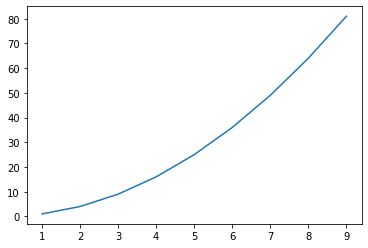

In [9]:
plt.plot(x,y)
plt.show()

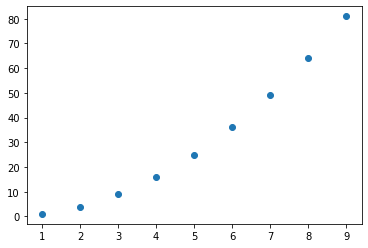

In [10]:
plt.scatter(x,y)
plt.show()

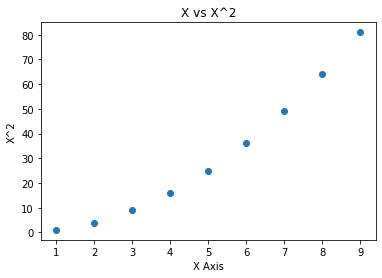

In [11]:
plt.scatter(x,y)
plt.xlabel("X Axis")
plt.ylabel("X^2")
plt.title("X vs X^2")
plt.show()

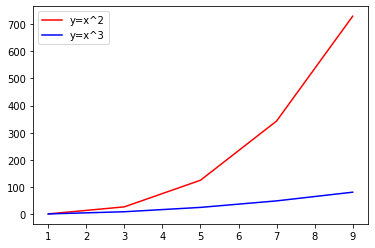

In [23]:
plt.plot(x,x**2,color='r')
plt.plot(x,x**3,color='b')
plt.legend( [ "y=x^2", "y=x^3" ],loc=2 ) #order matters! Same order at .plot()
plt.show()

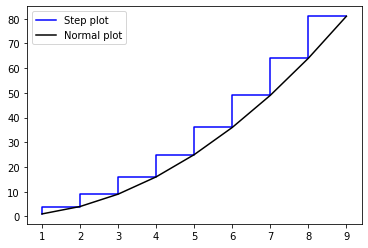

In [27]:
plt.step(x,x**2,'blue')
plt.plot(x,x**2,'black')
plt.legend(["Step plot","Normal plot"])
plt.show()

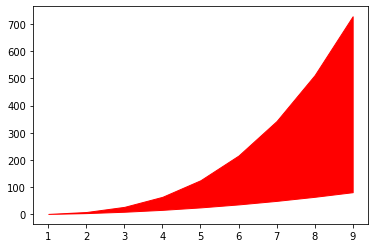

In [28]:
plt.fill_between(x,x**2,x**3,color='r')
plt.show()

In [29]:
data = sns.load_dataset('tips') #pd.read_csv()

In [30]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [32]:
def encode(x):
    if x=='Female':
        return 0
    else:
        return 1

In [34]:
data['sex']=data['sex'].apply(encode) # lambda x: 0 if x=='Female' else 1
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


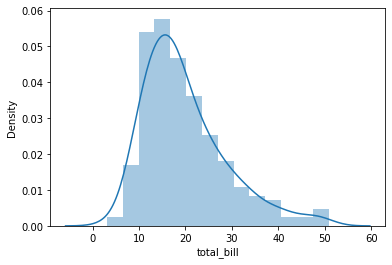

In [36]:
#Dist plot
#Numerical columns only
sns.distplot(data['total_bill'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


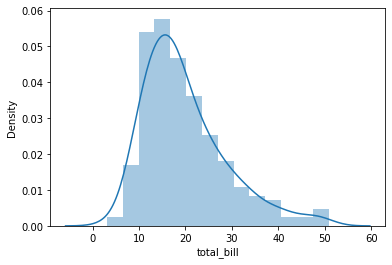

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


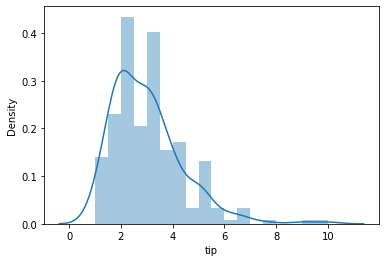

In [39]:
for col in ['total_bill','tip']:#data.columns[0:2]: #[l,u)
    sns.distplot(data[col])
    plt.show()

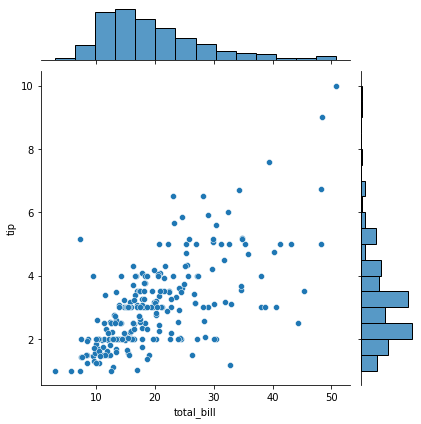

In [40]:
#Joint Plot
#numerical vs numerical
sns.jointplot(x=data['total_bill'],y=data['tip'])
plt.show()

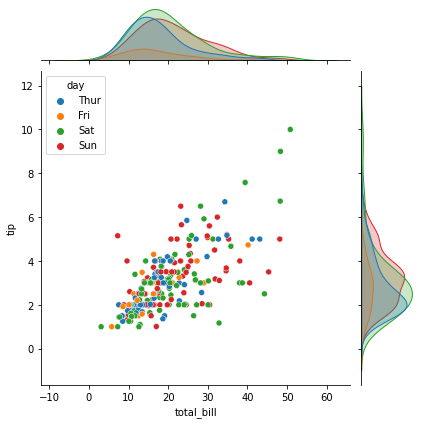

In [43]:
sns.jointplot(x=data['total_bill'],y=data['tip'],hue=data['day'] ) #hue is a categorical column

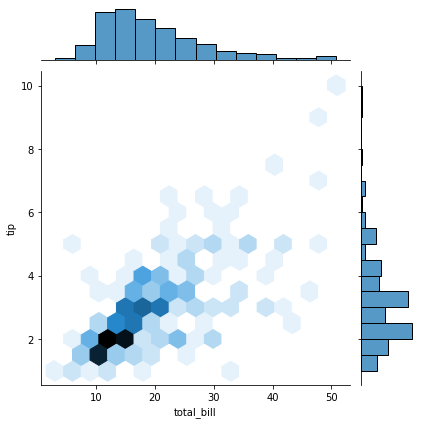

In [45]:
sns.jointplot(x=data['total_bill'],y=data['tip'],kind='hex' )

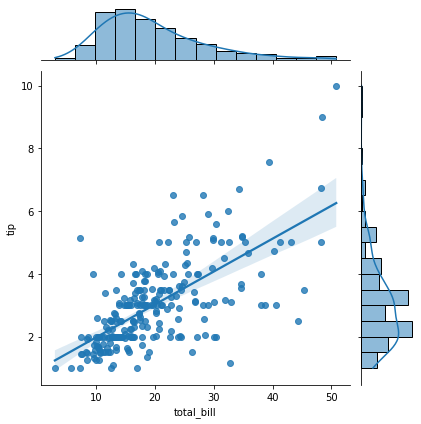

In [47]:
sns.jointplot(x=data['total_bill'],y=data['tip'],kind='reg' )

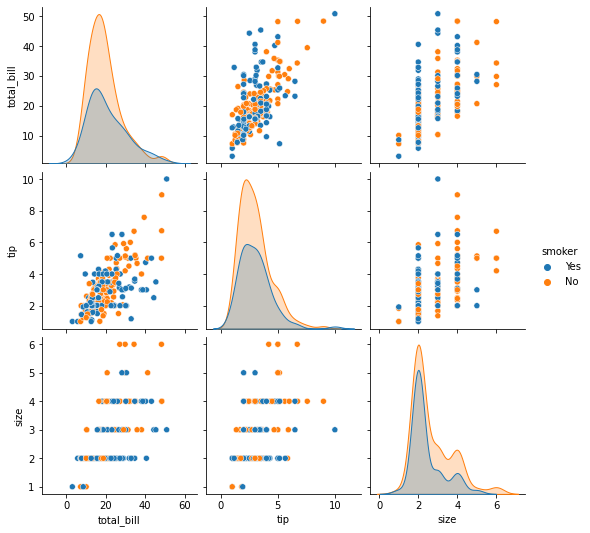

In [49]:
sns.pairplot(data,hue='smoker')

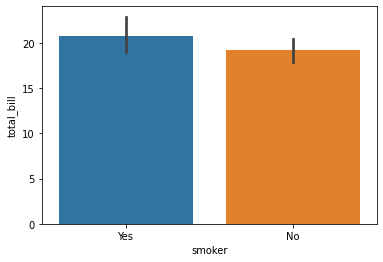

In [51]:
#Catergorical
sns.barplot(x=data['smoker'],y=data['total_bill']) #Mean values of each category

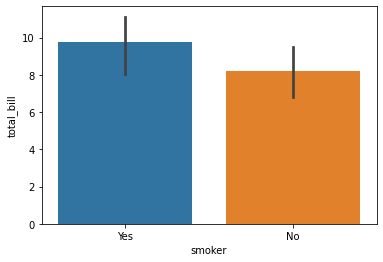

In [52]:
sns.barplot(x=data['smoker'],y=data['total_bill'],estimator=np.std) #std div

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


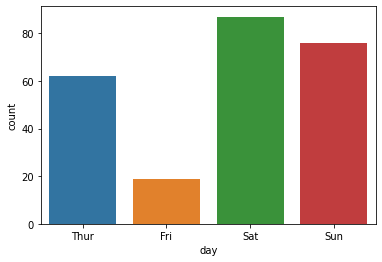

In [55]:
sns.countplot(data['day'])

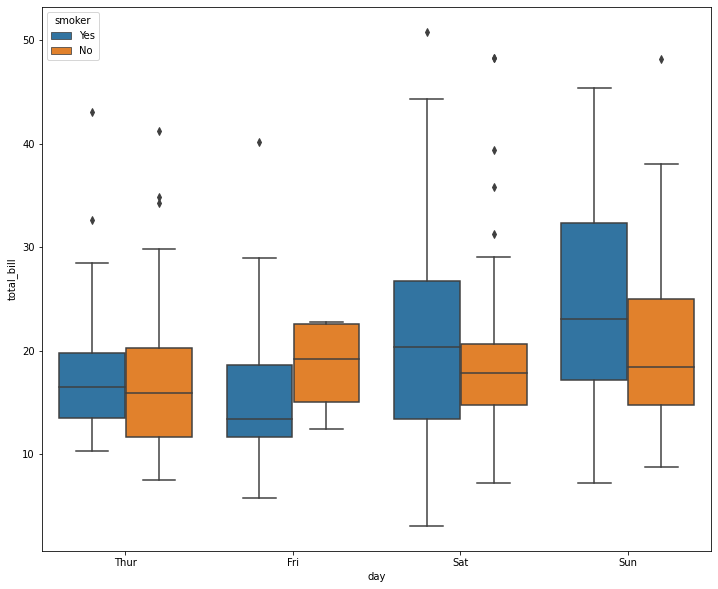

In [58]:
#Catergorical vs Numerical
plt.figure(figsize=(12,10))
sns.boxplot(x=data['day'],y=data['total_bill'],hue=data['smoker'])

In [59]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


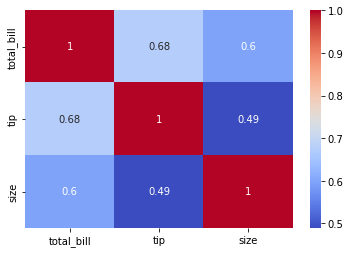

In [61]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [69]:
smokerYesCount=data[ (data['smoker']=="Yes") & (data['sex']==0) ]['smoker'].count() # ans is &, or is |, equal is == , not equal is !=
totalCount=data['smoker'].count()
print("Percentage is:",smokerYesCount/totalCount * 100)

Percentage is: 13.524590163934427


In [70]:
import sklearn

In [ ]:
xtrain,xtest,ytrain,ytest = sklearn.model_selection.train_test_split(data[data.columns[:-2]],data['size'],test_size=0.2)